In [219]:
import numpy as np
import pandas as pd

In [220]:
df1 = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df2 = pd.read_csv('custom_messages.csv')


In [221]:
df1.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1740,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,spam,NaN,NaN,NaN
4906,Then anything special?,ham,NaN,NaN,NaN
1145,"Thank you, winner notified by sms. Good Luck! ...",spam,NaN,NaN,NaN
5471,Yup,ham,NaN,NaN,NaN
3572,You won't believe it but it's true. It's Incre...,spam,NaN,NaN,NaN


In [222]:
df2.sample(5)

,Message,Category
310,Your order #2825 has been dispatched.,Logistic
635,Unusual activity detected in your account. Ver...,Fraud
591,Enter OTP 531710 to proceed with your transact...,OTP
241,Your package is out for delivery and will arri...,Logistic
687,Enter OTP 990300 to proceed with your transact...,OTP


In [223]:
df1.shape

(5572, 5)

In [224]:
df2.shape

(900, 2)

In [225]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [226]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [227]:

df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [228]:
df1.sample(5)

,v1,v2
2624,S da..al r above &lt;#&gt;,ham
3628,Should I head straight there or what,ham
3178,Does cinema plus drink appeal tomo? * Is a fr ...,ham
2920,"Yo, any way we could pick something up tonight?",ham
5266,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...,ham


In [229]:

df1.rename(columns={'v1':'Message','v2':'Category'},inplace=True)
df1.sample(5)

,Message,Category
4427,Aiyar dun disturb u liao... Thk u have lots 2 ...,ham
4390,The greatest test of courage on earth is to be...,ham
1745,IåÕm cool ta luv but v.tired 2 cause i have be...,ham
3699,Oh...i asked for fun. Haha...take care. Ì_,ham
4163,"Its ok, called mom instead have fun",ham


In [230]:

df = pd.concat([df1, df2], ignore_index=True)


In [231]:

df = df.sample(frac=1).reset_index(drop=True)


In [232]:
df.to_csv('combined_dataset.csv', index=False)
print("Combined dataset saved as combined_dataset.csv")


Combined dataset saved as combined_dataset.csv


In [233]:
df['Category'].value_counts()

Category
ham         4825
spam         747
OTP          300
Fraud        300
Logistic     300
Name: count, dtype: int64

In [234]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [235]:
df['Category'] = encoder.fit_transform(df['Category'])

In [236]:
df.head()

,Message,Category
0,Call FREEPHONE 0800 542 0578 now!,4
1,All these nice new shirts and the only thing I...,3
2,Hmm thinking lor...,3
3,How are you babes. Hope your doing ok. I had a...,3
4,I always chat with you. In fact i need money c...,3


In [237]:

df.isnull().sum()

Message     0
Category    0
dtype: int64

In [238]:
df.shape

(6472, 2)

## 2.EDA

In [239]:
df.head()

,Message,Category
0,Call FREEPHONE 0800 542 0578 now!,4
1,All these nice new shirts and the only thing I...,3
2,Hmm thinking lor...,3
3,How are you babes. Hope your doing ok. I had a...,3
4,I always chat with you. In fact i need money c...,3


In [240]:
df['Category'].value_counts()

Category
3    4825
4     747
2     300
0     300
1     300
Name: count, dtype: int64

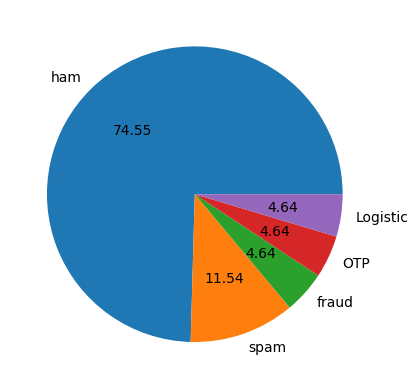

In [241]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam','fraud','OTP','Logistic'],autopct="%0.2f")
plt.show()

In [242]:
import nltk

In [243]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [244]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\premb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\premb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
df['num_characters'] = df['Message'].apply(len)

In [246]:
df.head()

,Message,Category,num_characters
0,Call FREEPHONE 0800 542 0578 now!,4,33
1,All these nice new shirts and the only thing I...,3,95
2,Hmm thinking lor...,3,19
3,How are you babes. Hope your doing ok. I had a...,3,161
4,I always chat with you. In fact i need money c...,3,62


In [247]:

df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [248]:
df.head()

,Message,Category,num_characters,num_words
0,Call FREEPHONE 0800 542 0578 now!,4,33,7
1,All these nice new shirts and the only thing I...,3,95,24
2,Hmm thinking lor...,3,19,4
3,How are you babes. Hope your doing ok. I had a...,3,161,36
4,I always chat with you. In fact i need money c...,3,62,16


In [249]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [250]:
df.head()

,Message,Category,num_characters,num_words,num_sentences
0,Call FREEPHONE 0800 542 0578 now!,4,33,7,1
1,All these nice new shirts and the only thing I...,3,95,24,1
2,Hmm thinking lor...,3,19,4,1
3,How are you babes. Hope your doing ok. I had a...,3,161,36,6
4,I always chat with you. In fact i need money c...,3,62,16,2


In [251]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6472.000000,6472.000000,6472.000000
mean,76.129017,17.615266,1.921199
std,56.363455,13.052454,1.434923
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,57.000000,13.000000,1.000000
75%,107.250000,25.000000,2.000000
max,910.000000,220.000000,38.000000


In [252]:
df['Category'].value_counts()

Category
3    4825
4     747
2     300
0     300
1     300
Name: count, dtype: int64

In [253]:
#ham
df[df['Category'] == 3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [254]:
#spam
df[df['Category'] == 4][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [255]:
#fraud
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,300.000000,300.00000,300.0
mean,59.733333,11.84000,2.0
std,7.126817,1.76203,0.0
min,49.000000,10.00000,2.0
25%,49.000000,10.00000,2.0
50%,62.000000,11.00000,2.0
75%,66.000000,14.00000,2.0
max,66.000000,14.00000,2.0


In [256]:
#Logistic
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,300.000000,300.000000,300.0
mean,46.133333,10.203333,1.0
std,8.689106,2.213214,0.0
min,37.000000,8.000000,1.0
25%,37.000000,8.000000,1.0
50%,42.000000,9.000000,1.0
75%,57.000000,13.000000,1.0
max,57.000000,13.000000,1.0


In [ ]:
#OTP
df[df['Category'] == 2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,300.000000,300.000000,300.000000
mean,48.416667,10.666667,1.366667
std,1.230761,1.288834,0.482700
min,47.000000,9.000000,1.000000
25%,47.000000,9.000000,1.000000
50%,48.000000,11.000000,1.000000
75%,50.000000,12.000000,2.000000
max,50.000000,12.000000,2.000000


In [258]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

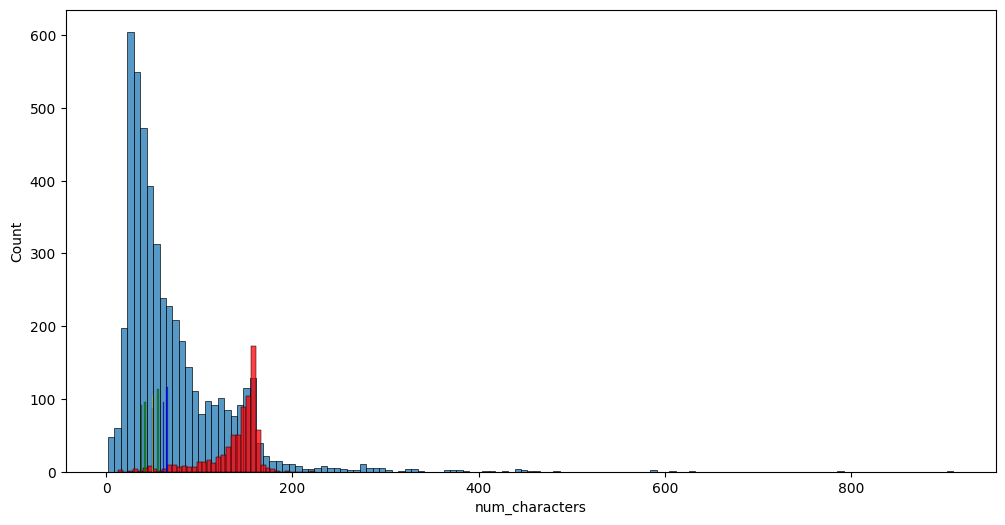

In [259]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 3]['num_characters'])
sns.histplot(df[df['Category'] == 4]['num_characters'],color='red')
sns.histplot(df[df['Category'] == 0]['num_characters'],color='b')
sns.histplot(df[df['Category'] == 1]['num_characters'],color='g')
sns.histplot(df[df['Category'] == 2]['num_characters'],color='y')

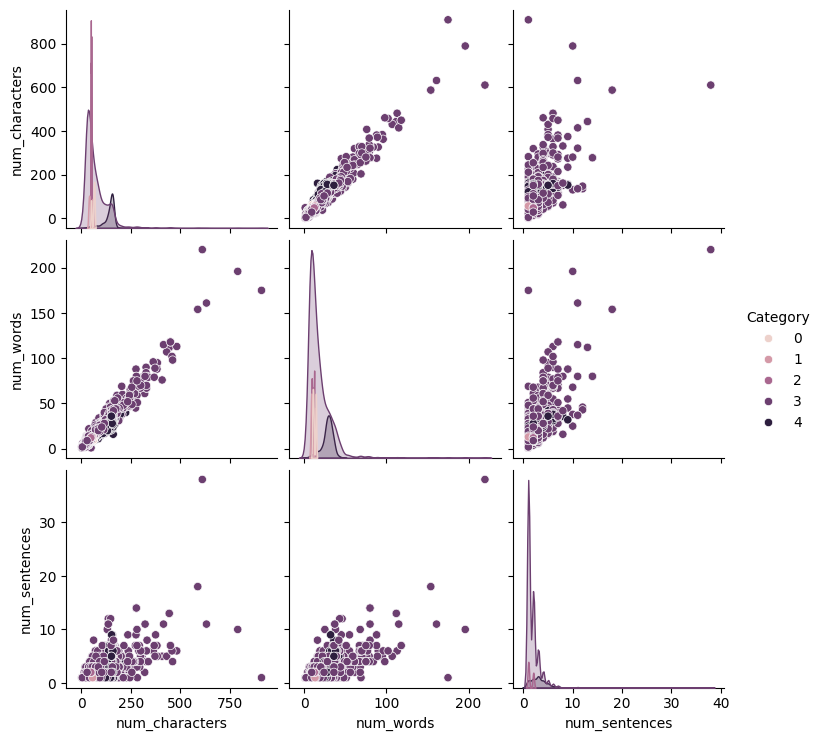

In [260]:
sns.pairplot(df,hue='Category')

In [261]:
heatmapdata = df.drop(columns=['Message'])

<Axes: >

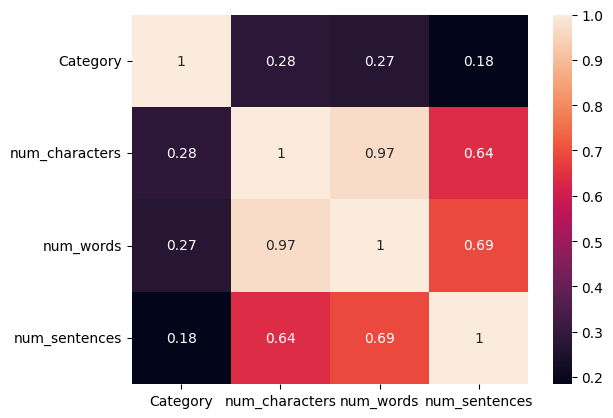

In [262]:
sns.heatmap(heatmapdata.corr(),annot=True)

## 3. Data Preprocessing
- Converting into Lower case
- Tokenization (Break down into words)
- Removing special characters 
- Removing stop words (is,of,the) and punctuation
- Stemming (us,usa,america)

In [263]:
from nltk.corpus import stopwords
import string

In [264]:
def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [265]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [266]:
df['Message'][10]

"Slaaaaave ! Where are you ? Must I summon you to me all the time now ? Don't you wish to come to me on your own anymore?"

In [267]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [268]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [269]:
df.head()

,Message,Category,num_characters,num_words,num_sentences,transformed_text
0,Call FREEPHONE 0800 542 0578 now!,4,33,7,1,call freephon 0800 542 0578
1,All these nice new shirts and the only thing I...,3,95,24,1,nice new shirt thing wear nudist theme mu
2,Hmm thinking lor...,3,19,4,1,hmm think lor
3,How are you babes. Hope your doing ok. I had a...,3,161,36,6,babe hope shit night sleep fell asleep knacker...
4,I always chat with you. In fact i need money c...,3,62,16,2,alway chat fact need money rais


## 4. Model Building

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [271]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [274]:
X.shape

(6472, 3000)

In [276]:
y = df['Category'].values

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [279]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [280]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [283]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.8756756756756757
[[ 70   0   0   0   0]
 [  0  54   0   0   0]
 [  0   0  64   0   0]
 [  0   5   0 828 134]
 [  0   0   0  22 118]]
0.8715251705201854


In [285]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))

0.9768339768339769
[[ 70   0   0   0   0]
 [  0  54   0   0   0]
 [  0   0  64   0   0]
 [  0   0   2 964   1]
 [  0   0   0  27 113]]
0.9867359666021305


In [303]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))